# Problem Statement: Predicting if the client will subscribe to a term deposit

## Importing the relevant libraries for our data analysis

### Data source: https://www.kaggle.com/janiobachmann/bank-marketing-dataset

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)

## Importing the dataset using pandas

In [127]:
data = pd.read_csv('bank-full.csv',sep=';')

## Exploring the headers of the data set to understand the variables (i.e. columns) better

In [128]:
data.head(100)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## We notice the following from the dataset:
### 1. The mean client age is approximately around 41 years old.
### 2. The minimum and maximum age of the banks clients being 18 years old and 95 years old respectively.

In [130]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## We notice that all of the columns are filled (i.e. no missing values). In the event that our dataset contained missing values, we would have to fill them with either the mean, mode or median.

## However, there are certain columns with unknown entries (i.e. education and job). The next step would be to find out how to we deal with these unknown entries. 

In [131]:
data['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

### We notice that for the education column, there are 1857 unknown entries and this makes up approximately 4.1% of the entire data set. As this is a relatively small number, we can choose to just drop these unknown entries from our dataset.

In [132]:
index_education = data[data['education'] == 'unknown'].index
data.drop(index_education,inplace=True)

In [133]:
data['contact'].value_counts()

cellular     28295
unknown      12343
telephone     2716
Name: contact, dtype: int64

### For the contact column, there are 12,343 unknown entries and this makes up approximately 27.3% of the entire data set. This represents a fairly large percentage of the data set and thus we should not drop it.

In [96]:
index_contact = data[data['contact'] == 'unknown'].index
data.drop(index_contact,inplace=True)

In [97]:
data['job'].value_counts()

management       7329
technician       5563
blue-collar      5535
admin.           3536
services         2628
retired          1673
self-employed    1154
entrepreneur      999
unemployed        966
housemaid         868
student           656
unknown           104
Name: job, dtype: int64

### For the job column, there are 161 unknown entries and this makes up aproximately 0.64% of the enture data set. As this is a very small number, we will just drop these unknown entries from our dataset.|

In [98]:
index_job = data[data['job']=='unknown'].index
data.drop(index_job,inplace=True)

In [99]:
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
12657,27,management,single,secondary,no,35,no,no,cellular,4,jul,255,1,-1,0,unknown,no
12658,54,blue-collar,married,primary,no,466,no,no,cellular,4,jul,297,1,-1,0,unknown,no
12659,43,blue-collar,married,secondary,no,105,no,yes,cellular,4,jul,668,2,-1,0,unknown,no
12660,31,technician,single,secondary,no,19,no,no,telephone,4,jul,65,2,-1,0,unknown,no
12661,27,technician,single,secondary,no,126,yes,yes,cellular,4,jul,436,4,-1,0,unknown,no
12662,28,blue-collar,single,secondary,no,-127,yes,no,cellular,4,jul,1044,3,-1,0,unknown,yes
12663,50,blue-collar,married,secondary,no,1329,yes,yes,telephone,4,jul,141,2,-1,0,unknown,no
12664,29,blue-collar,single,primary,no,343,no,no,cellular,4,jul,39,2,-1,0,unknown,no
12665,25,blue-collar,single,secondary,no,192,no,no,telephone,4,jul,112,2,-1,0,unknown,no
12666,38,blue-collar,married,secondary,no,43,no,yes,cellular,4,jul,135,3,-1,0,unknown,no


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30907 entries, 12657 to 45210
Data columns (total 17 columns):
age          30907 non-null int64
job          30907 non-null object
marital      30907 non-null object
education    30907 non-null object
default      30907 non-null object
balance      30907 non-null int64
housing      30907 non-null object
loan         30907 non-null object
contact      30907 non-null object
day          30907 non-null int64
month        30907 non-null object
duration     30907 non-null int64
campaign     30907 non-null int64
pdays        30907 non-null int64
previous     30907 non-null int64
poutcome     30907 non-null object
y            30907 non-null object
dtypes: int64(7), object(10)
memory usage: 4.2+ MB


### After dropping the unknown entries we notice that the mean and standard deviation of the variables such as age, balance, day , duration, campaign , pdays and previous does not change by much.

In [101]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,30907.000000,30907.000000,30907.000000,30907.000000,30907.000000,30907.000000,30907.000000
mean,40.918918,1425.760701,15.967257,260.485003,2.751318,55.944835,0.808490
std,10.922583,3190.967030,8.226736,257.783963,2.954412,112.726930,2.706169
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,32.000000,80.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,473.000000,16.000000,181.000000,2.000000,-1.000000,0.000000
75%,48.000000,1502.500000,21.000000,322.000000,3.000000,10.000000,1.000000
max,95.000000,102127.000000,31.000000,4918.000000,50.000000,871.000000,275.000000


## Now, we will begin to do some exploratory data analysis to find out more about our data.

### We will first begin by doing a quick pairplot to see if we are able to spot any trends before diving deeper.

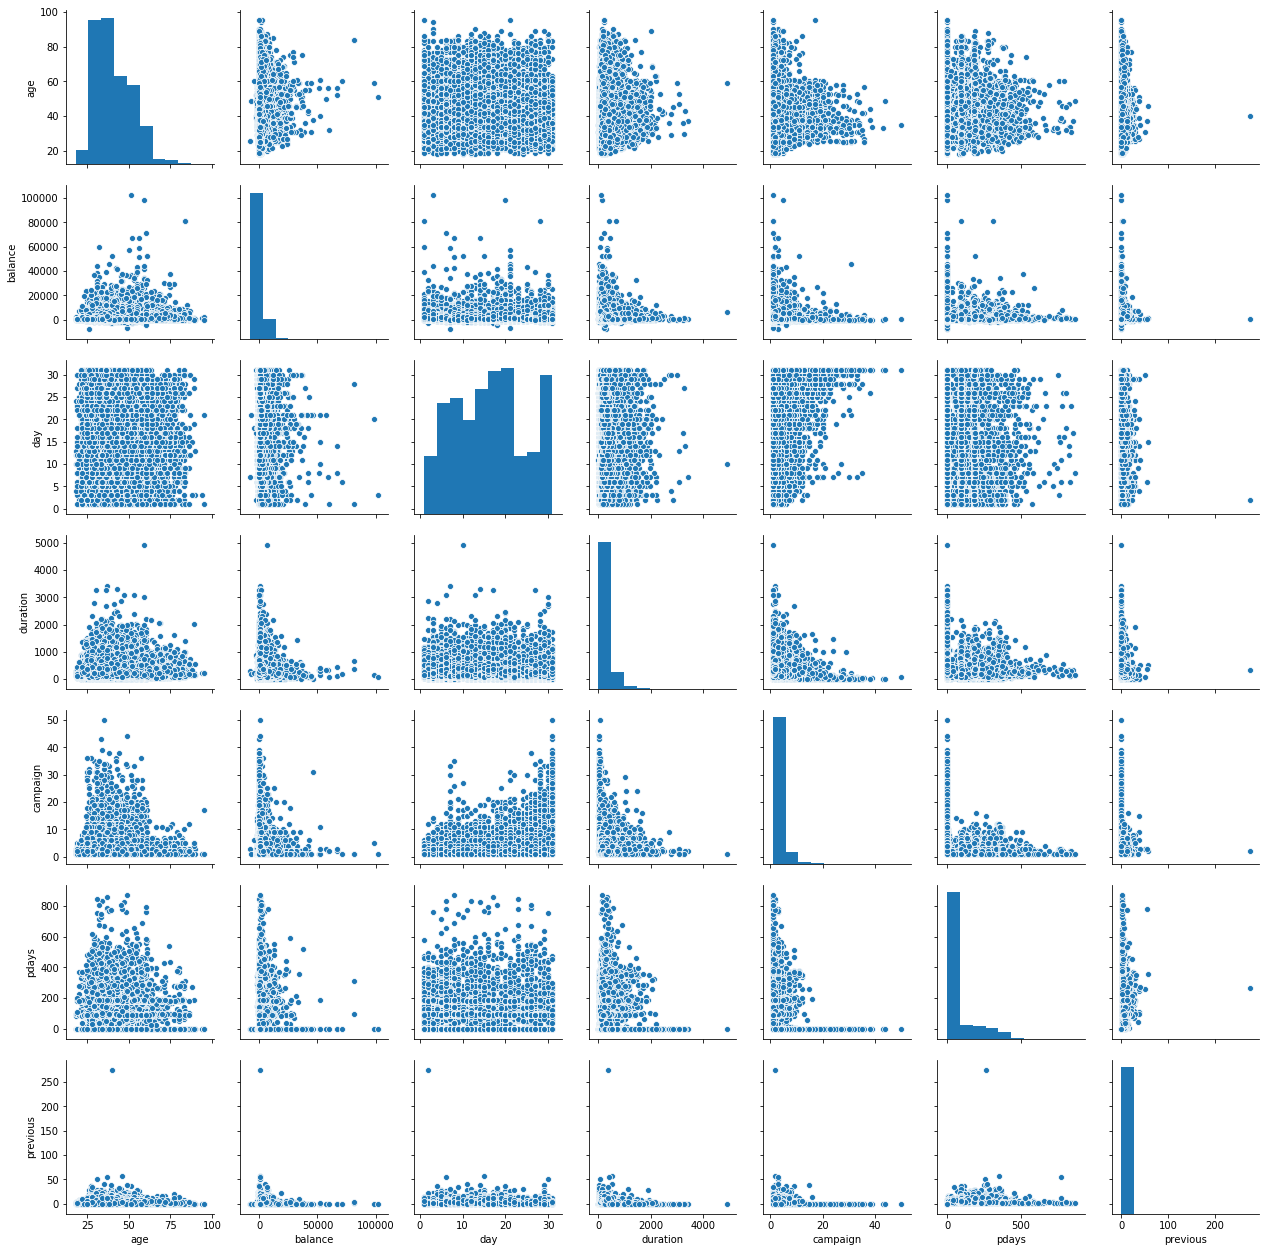

In [18]:
sns.pairplot(data)

### Next, we wish to find out more about the distribution of the ages in our data set. Hence, we will do a distribution plot. 
### From the distribution plot of the ages, we notice that the data set contains mostly people between the agres of 20-60 years old. Likely, majority of the banks clients are the working adults with most being in their mid to late thirties 

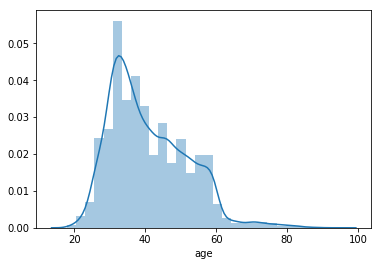

In [19]:
sns.distplot(data['age'],bins=30)

### Next, we wish to find out more about the distribution of the duration. We observe that the duration of contact for this dataset is mostly less than 1000 seconds (i.e. 17 mins). Mostly, the duration is around 100-200 seconds (i.e. 3 mins). This may imply that the bank telemarketeres only have around 3 minutes before they start to lose the attention of the clients.

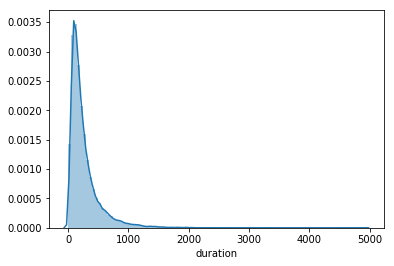

In [20]:
sns.distplot(data['duration'],bins=100)

### Let us see how does the pairplot changes by the maritial status.

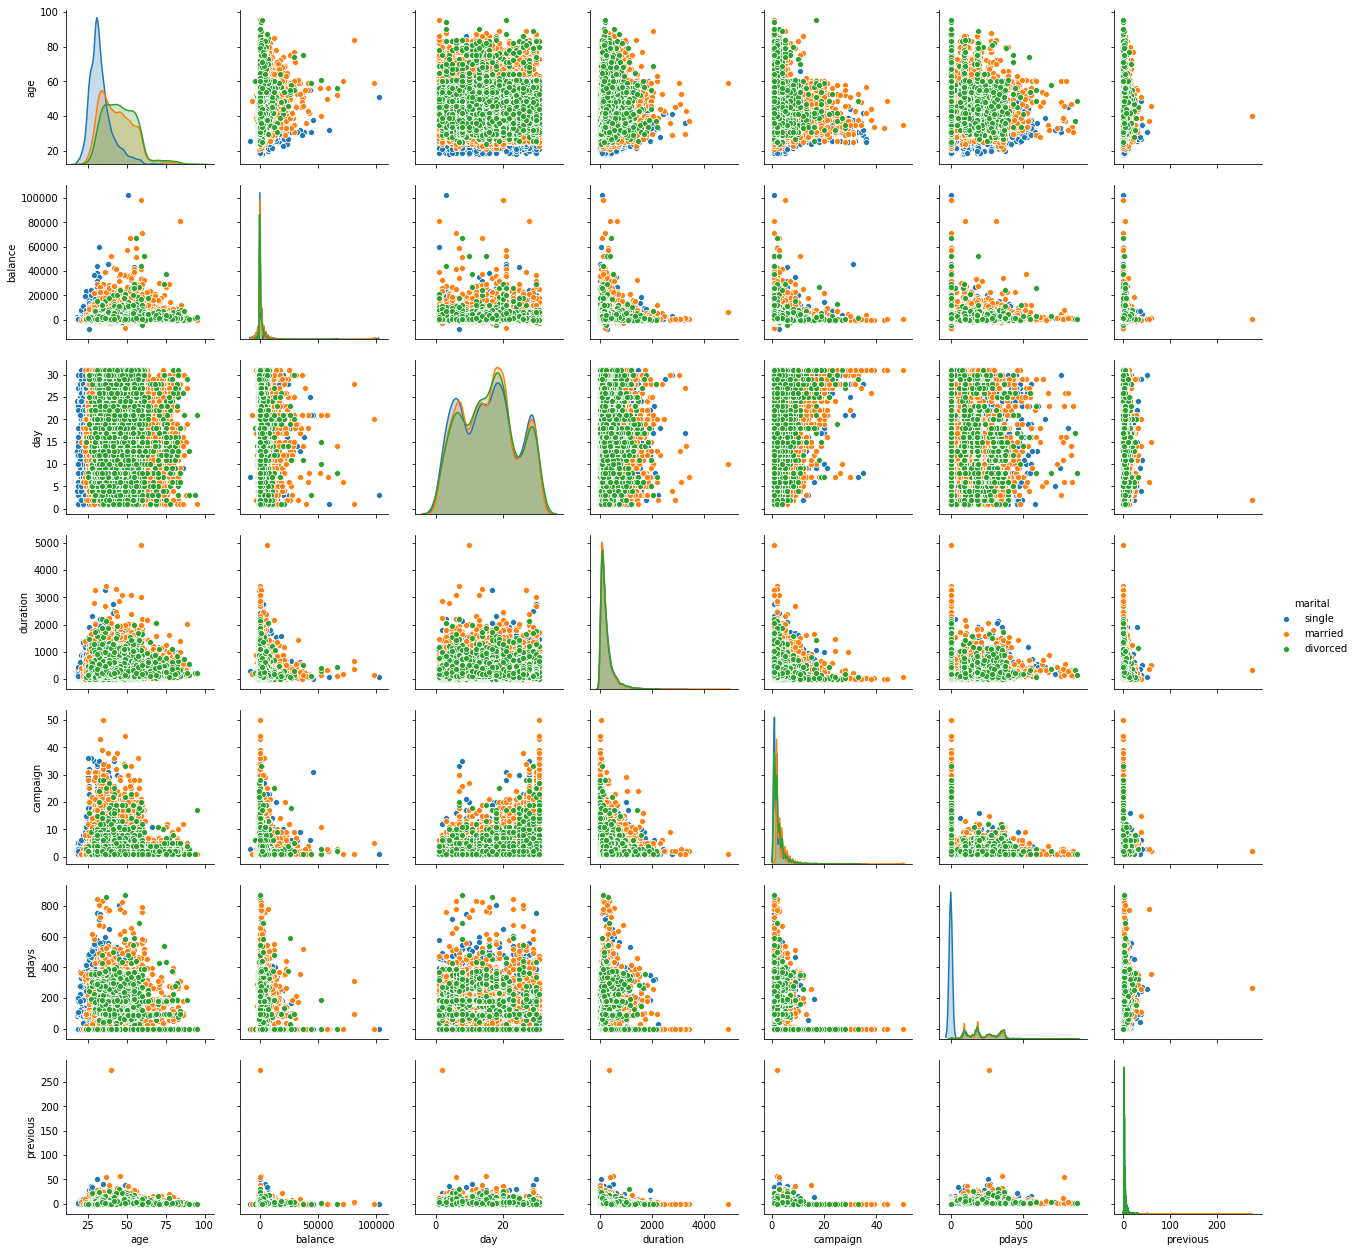

In [21]:
sns.pairplot(data,hue='marital')

### To see if the variables have any correlation with one another, we do a heat map. From the heat map, we notice that most of the variables are very weakly correlated to one another. The highest correlation we have is between the variable previous and pdays (around 0.43). Even so, previous and pdays are still weakly correlated to one another.

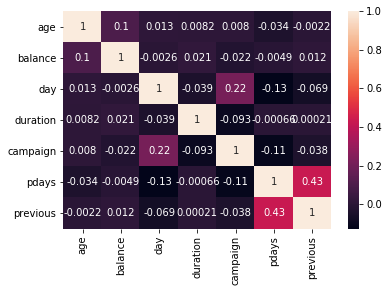

In [22]:
sns.heatmap(data.corr(),annot=True)

### From the barplot between the maritial status and average yearly balance, we can see that married couples have the higest average yearly bank balance followed by singles and lastly divorcees. This makes sense as married couples would have dual income (i.e. husband + wife).

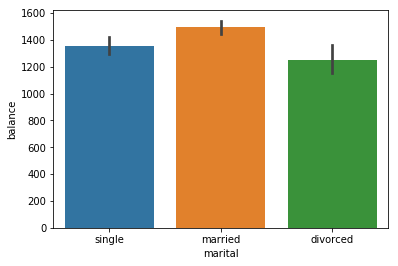

In [23]:
sns.barplot(x='marital',y='balance',data = data)

### From the barplot between the education level and bank balance, we notice that people with tertiary background usually have a higher average yearly balance. This kind of makes sense as the more educated you are, the more likely you have a stable and better paying job and thus the more likely you will be able to save money.

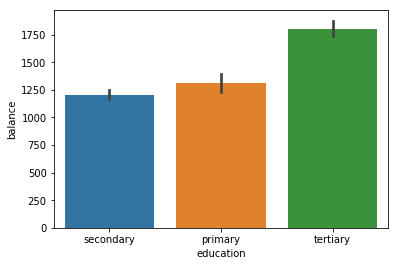

In [24]:
sns.barplot(x='education',y='balance',data =data)

### From the barplot between the average yearly balance and loan, we notice that people without loans tend to have a much higher (around 50% more) in their average yearly balance than those with loans. This makes sense since people with loans would want to pay off their loans as quickly as possible and thus their average yearly balance should be lower.

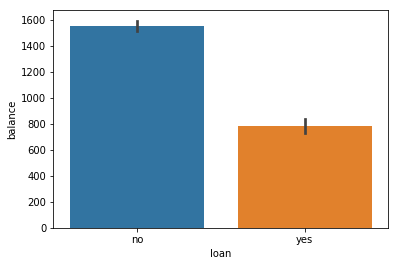

In [25]:
sns.barplot(x='loan',y='balance',data= data)

### Similarly, we notice from the barplot below that those with housing loans have a lower yearly average balance as compared to those without housing loans.

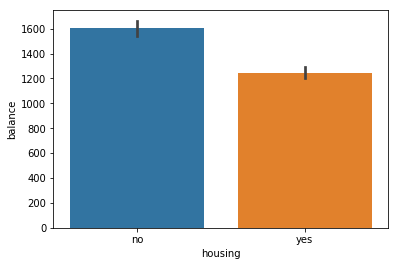

In [26]:
sns.barplot(x='housing',y='balance',data=data)

### From the barplot below, we notice that the retirees have the highest average yearly balance in their bank account followed by those who are in managment and those who are self-employed. This kind of make sense since retirees should already have a sufficient amount of money in their bank account in order to sustain their retiree lifestyle. However, interestingly, we notice that students tend to have a higher average yearly balance than those who are working (i.e. technician , blue-collar workers etc).

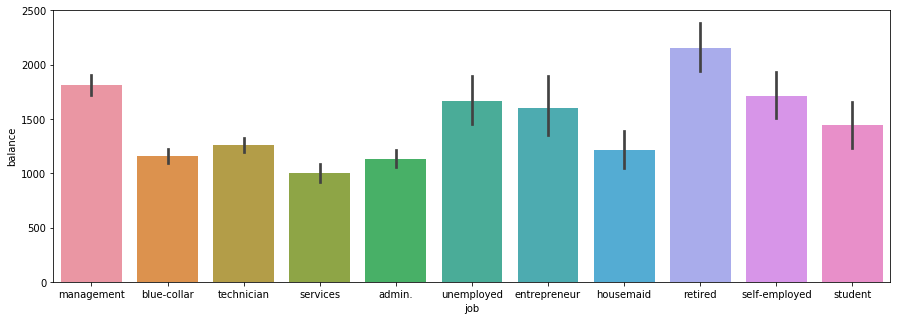

In [27]:
plt.figure(figsize=(15,5))
sns.barplot(x='job',y='balance',data = data)

### We notice from the barplot below, those with a higher average yearly bank balanace are more likely to subscribe to term deposits.

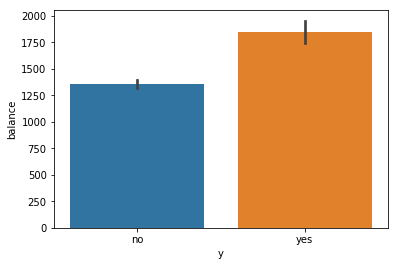

In [28]:
sns.barplot(x='y', y='balance',data=data)

### In order to find out more about those who subscribe to the term deposit, we notice than the average age of these people are usually just below 40 years old.

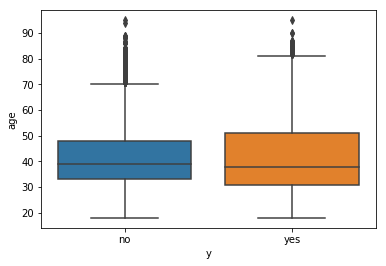

In [29]:
sns.boxplot(x='y',y='age',data=data)

### We also plotted the age with the different jobs and found out that the average age of the retirees is around early 60s while those in management roles and self employed are around late 30s to early 40s respectively.

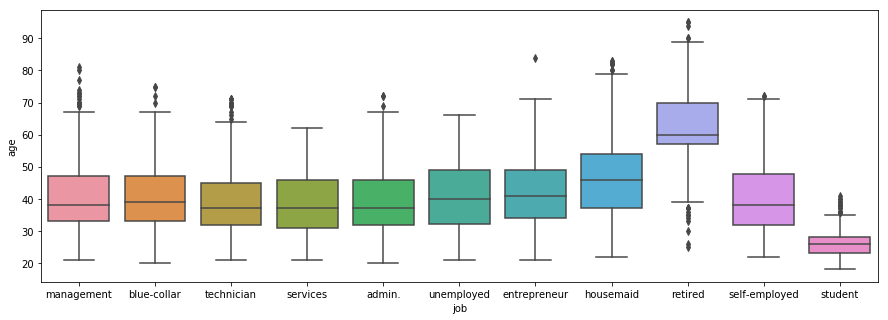

In [30]:
plt.figure(figsize=(15,5))
sns.boxplot(x='job',y='age',data=data)

## Now, we will begin to use machine learning to try and predict if a client would suscribe to the bank's term deposit. This is a classication problem since we are trying to predict whether a client will subscrite to the bank's term deposit. The target variable (i.e. y) has two classes - yes and no.

## For this classification problem, we will use three Machine Learning Models and do a comparison on which models would perform the best. 

## In this case, a good metric to determine the best model is dependent on our objective (i.e. to determine if the client would subscribe to a term deposit). In this case, we would need to look out and optimize the model for better precision or specificity since false negative (i.e. we predict that the client would not subscribe to the term deposit but he actually will) is more acceptable than false positive (i.e. we predict that the client will subscrive to the term deposit but he does not). False positive prediction will be harmful to the bank as it may give a false sense of the projected revenue.

### Before we begin to build the model, we would first need to do two things: 
### 1. Convert the categorical variables values to dummy values

In [102]:
data_new = data

In [103]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [104]:
data_new['job']=le.fit_transform(data_new['job'])
data_new['marital'] = le.fit_transform(data_new['marital'])
data_new['education'] = le.fit_transform(data_new['education'])
data_new['default'] = le.fit_transform(data_new['default'])
data_new['housing'] = le.fit_transform(data_new['housing'])
data_new['loan'] = le.fit_transform(data_new['loan'])
data_new['contact'] = le.fit_transform(data_new['contact'])
data_new['month'] = le.fit_transform(data_new['month'])
data_new['poutcome'] = le.fit_transform(data_new['poutcome'])
data_new['y'] = le.fit_transform(data_new['y'])

In [105]:
data_new

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
12657,27,4,2,1,0,35,0,0,0,4,5,255,1,-1,0,3,0
12658,54,1,1,0,0,466,0,0,0,4,5,297,1,-1,0,3,0
12659,43,1,1,1,0,105,0,1,0,4,5,668,2,-1,0,3,0
12660,31,9,2,1,0,19,0,0,1,4,5,65,2,-1,0,3,0
12661,27,9,2,1,0,126,1,1,0,4,5,436,4,-1,0,3,0
12662,28,1,2,1,0,-127,1,0,0,4,5,1044,3,-1,0,3,1
12663,50,1,1,1,0,1329,1,1,1,4,5,141,2,-1,0,3,0
12664,29,1,2,0,0,343,0,0,0,4,5,39,2,-1,0,3,0
12665,25,1,2,1,0,192,0,0,1,4,5,112,2,-1,0,3,0
12666,38,1,1,1,0,43,0,1,0,4,5,135,3,-1,0,3,0


### 2. Split the data into the respective training and testing set.

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
X = data_new.loc[:,data_new.columns != 'y']
y = data_new['y']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [37]:
#X = data[data.loc[:,data.columns != 'y']]
#y = data['y']

#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

## ML Model 1: Decision Tree for Classification

In [38]:
#Import Decision Tree model
from sklearn.tree import DecisionTreeClassifier

In [39]:
dtree = DecisionTreeClassifier()

In [40]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [41]:
dtree_predictions = dtree.predict(X_test)

In [42]:
from sklearn.metrics import classification_report,confusion_matrix

In [43]:
print(classification_report(y_test,dtree_predictions))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      7905
           1       0.47      0.49      0.48      1368

    accuracy                           0.84      9273
   macro avg       0.69      0.70      0.69      9273
weighted avg       0.85      0.84      0.84      9273



In [44]:
print(confusion_matrix(y_test,dtree_predictions))

[[7162  743]
 [ 703  665]]


### From the classification report, we notice that accuracy of the prediction is 84%. The null accuracy for this test set is around 85.4%. This means that the decision tree model did not perform too well.

### Separately, for the precision score, we observe that the the decision tree model predicted the class yes and no around 48% and 91% respectively correctly.

## ML Model 2: Random Forest Method

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rfc = RandomForestClassifier()

In [47]:
rfc.fit(X_train,y_train)

C:\Users\santo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [48]:
rfc_predict = rfc.predict(X_test)

In [49]:
print(classification_report(y_test,rfc_predict))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      7905
           1       0.66      0.39      0.49      1368

    accuracy                           0.88      9273
   macro avg       0.78      0.68      0.71      9273
weighted avg       0.87      0.88      0.87      9273



In [50]:
print(confusion_matrix(y_test,rfc_predict))

[[7633  272]
 [ 839  529]]


### From the classification report, we observe that the accuracy score of the random forest model fared slightly better (i.e. 3% higher). It is around 2.6% higher than the null accuracy of 85.4%.

### or the precision scores, the random forest model predicted the classes yes and no correctly 66% and 90% respectively. We also observe that less false positivies were predicted using the random forest model as compared to just the decision tree model.

## ML Model 3: Support Vector Machines (SVM)

In [48]:
from sklearn.svm import SVC

In [49]:
model = SVC()

In [50]:
model.fit(X_train,y_train)

C:\Users\santo\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [51]:
svc_predict = model.predict(X_test)

In [52]:
print(classification_report(y_test,svc_predict))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      7897
           1       0.00      0.00      0.00      1376

    accuracy                           0.85      9273
   macro avg       0.43      0.50      0.46      9273
weighted avg       0.73      0.85      0.78      9273



C:\Users\santo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\santo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\santo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Notice something odd about the results. The SVM model basically predicted everything to belong to the no class. The reason why this occurs is because our model needs to have its parameters adjusted. Furthermore, it also helps to normalize the data before passing into the SVM classifier.

### We will use grid search to optimize and find the best parameters. Grid search helps to find the right parameters by trying out all the possible combinations of C and gamma. Through grid serach, we will get the optimal parameters which will give us the best results using SVM.

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
param_grid = {'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001]}

In [55]:
grid = GridSearchCV(SVC(),param_grid,verbose =3)

In [ ]:
grid.fit(X_train,y_train)

### The optimal parameters for SVM using Grid Search are C = 1 and gamma = 0.01.

In [ ]:
grid.best_params_

In [ ]:
grid_predictions = grid.predict(X_test)

In [ ]:
print(classification_report(y_test,grid_predictions))

In [ ]:
print(confusion_matrix(y_test,grid_predictions))

### From the classification report, we observe that the accuracy score of the SVm model fared fairly well with an accuracy of 87% (i.e. 4% higher). It is around 1.6% higher than the null accuracy of 85.4%.

### In terms of the precision scores, the SVM model predicted the classes yes and no correctly 88% and 61% respectively. 

### Thus far, in comparison with the random forest model, the SVM performed very slighly better since it had a better precision score.

## ML Model 4: K Nearest Neighbour (KNN) Classification Model

### Because the KNN classsifier predicts the class (ie in our case whether the person will take up a term loan) by identifying the observations that are nearest to it, the scale of the variables acutally matters alot and any variables that are on a large scale will have a large effect on the distance between tobservations. Hence, we would need to normalize our data so that everything is standardize to the same scale.

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
data_new

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
12657,27,4,2,1,0,35,0,0,0,4,5,255,1,-1,0,3,0
12658,54,1,1,0,0,466,0,0,0,4,5,297,1,-1,0,3,0
12659,43,1,1,1,0,105,0,1,0,4,5,668,2,-1,0,3,0
12660,31,9,2,1,0,19,0,0,1,4,5,65,2,-1,0,3,0
12661,27,9,2,1,0,126,1,1,0,4,5,436,4,-1,0,3,0
12662,28,1,2,1,0,-127,1,0,0,4,5,1044,3,-1,0,3,1
12663,50,1,1,1,0,1329,1,1,1,4,5,141,2,-1,0,3,0
12664,29,1,2,0,0,343,0,0,0,4,5,39,2,-1,0,3,0
12665,25,1,2,1,0,192,0,0,1,4,5,112,2,-1,0,3,0
12666,38,1,1,1,0,43,0,1,0,4,5,135,3,-1,0,3,0


In [57]:
scaler = StandardScaler()

In [58]:
data_knn_drop = data_new.drop('y',axis=1)

In [59]:
data_knn_drop

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
12657,27,4,2,1,0,35,0,0,0,4,5,255,1,-1,0,3
12658,54,1,1,0,0,466,0,0,0,4,5,297,1,-1,0,3
12659,43,1,1,1,0,105,0,1,0,4,5,668,2,-1,0,3
12660,31,9,2,1,0,19,0,0,1,4,5,65,2,-1,0,3
12661,27,9,2,1,0,126,1,1,0,4,5,436,4,-1,0,3
12662,28,1,2,1,0,-127,1,0,0,4,5,1044,3,-1,0,3
12663,50,1,1,1,0,1329,1,1,1,4,5,141,2,-1,0,3
12664,29,1,2,0,0,343,0,0,0,4,5,39,2,-1,0,3
12665,25,1,2,1,0,192,0,0,1,4,5,112,2,-1,0,3
12666,38,1,1,1,0,43,0,1,0,4,5,135,3,-1,0,3


In [62]:
scaler.fit(data_new.drop('y',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [63]:
scaled_features = scaler.transform(data_new.drop('y',axis=1))

In [64]:
df_data = pd.DataFrame(scaled_features,columns=data_knn_drop.columns[:])

In [66]:
X = df_data
y = data_new['y']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
knn = KNeighborsClassifier(n_neighbors=1)

In [69]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [70]:
knn_predict = knn.predict(X_test)

In [71]:
print(classification_report(y_test,knn_predict))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      7875
           1       0.47      0.38      0.42      1398

    accuracy                           0.84      9273
   macro avg       0.68      0.65      0.66      9273
weighted avg       0.83      0.84      0.83      9273



In [72]:
print(confusion_matrix(y_test,knn_predict))

[[7261  614]
 [ 863  535]]


### We observe that when k = 1, the KNN model shows ok results. Not the best but we are going to explore if we can squeeze more from our model by choosing the optimal k value. This will be done by plotting a graph of the error rate vs the k value to determine the optimal k value we should use to get the best results using KNN model.

In [73]:
error_rate = []

In [74]:
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    prediction_i = knn.predict(X_test)
    error_rate.append(np.mean(prediction_i!=y_test))

In [75]:
plt.figure(figsize=(20,10))

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

Text(0, 0.5, 'Error Rate')

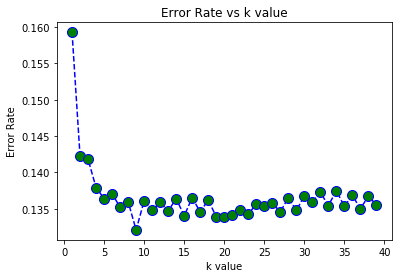

In [76]:
plt.plot(range(1,40),error_rate,color='blue',ls='dashed',marker='o',markerfacecolor='green',markersize=10)
plt.title('Error Rate vs k value')
plt.xlabel('k value')
plt.ylabel('Error Rate')

### Looking at the graph above, we can see that the error rate decreases with increasing k valuee. The error rate is the lowest at around k=23 and does not fluctuate as much in the k = 20-25 region. Hence we will choose our error rate to be k = 23.

In [78]:
knn = KNeighborsClassifier(n_neighbors=23)

In [79]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=23, p=2,
                     weights='uniform')

In [80]:
knn_predictions = knn.predict(X_test)

In [81]:
print(classification_report(y_test,knn_predictions))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      7875
           1       0.67      0.22      0.33      1398

    accuracy                           0.87      9273
   macro avg       0.77      0.60      0.63      9273
weighted avg       0.84      0.87      0.84      9273



In [82]:
print(confusion_matrix(y_test,knn_predictions))

[[7722  153]
 [1092  306]]


### From the classification report, we observe that the accuracy score of the KNN model fared fairly well with an accuracy of 87%. It is around 1.6% higher than the null accuracy of 85.4%.

### In terms of the precision scores, the KNN model predicted the classes yes and no correctly 88% and 67% respectively. Hence, in conclusion, we can see that the best supervised classification model is KNN followed by SVM , Random Forest and finally decision tree in predicting whether a client would subscribe to the bank's term deposit. However, do note that SVM and KNN are not much far off in terms of their classification performance. 


## ML Model 5: XGBoost

In [111]:
import xgboost

In [112]:
xgb = xgboost.XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

In [113]:
xgb.fit(X_train,y_train

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.08, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.75, verbosity=1)

In [114]:
xgb_predictions = xgb.predict(X_test)

In [115]:
print(classification_report(y_test,xgb_predictions))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      7864
           1       0.66      0.48      0.55      1409

    accuracy                           0.88      9273
   macro avg       0.78      0.72      0.74      9273
weighted avg       0.87      0.88      0.87      9273



In [116]:
print(confusion_matrix(y_test,xgb_predictions))

[[7515  349]
 [ 737  672]]


### From the classification report, we observe that the accuracy score of the KNN model fared fairly well with an accuracy of 88%. It is around 2.6% higher than the null accuracy of 85.4%.

### In terms of the precision scores, the XGboost model predicted the classes yes and no correctly 91% and 66% respectively. 

### Hence, in conclusion, XGBoost classifier is the best model to predict whether or not a potential client will subscribe to a term deposit. We can also rank the  supervised classifier models as follows: 1) XGboost 2) KNN 3)SVM  4) Random Forest and 5) decision tree. However, do note that XGBoost and KNN are not much far off in terms of their classification performance. 

### Finally, we want to find out the feature importances from our trained model.

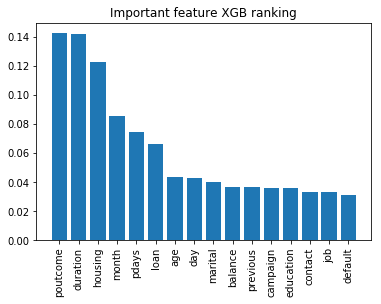

In [125]:
headers = ["name", "score"]
values = sorted(zip(X_train.columns, xgb.feature_importances_), key=lambda x: x[1] * -1)
xgb_feature_importances = pd.DataFrame(values, columns = headers)

x_pos = np.arange(0, len(xgb_feature_importances))
plt.bar(x_pos, xgb_feature_importances['score'])
plt.xticks(x_pos, xgb_feature_importances['name'])
plt.xticks(rotation=90)
plt.title('Important feature XGB ranking')

plt.show()

### From the figure above, we notice that the top 4 features from our dataset are poutcome, duration, housing and month.Hence, the bank has to focus on these features on their marketing campaign to try and entice potential clients to subscribe to their term deposit. 
